In [ ]:
## 1. La legge dei grandi numeri

#La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

#Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

# Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

#- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
import numpy as np
import pandas as pd 
import scipy.stats as st 
import matplotlib.pyplot as plt
import seaborn as sns 
import random
'''np.random.seed(42)
def simulazione_moneta(N):
    """Simula N lanci di moneta e restituisce la frequenza di teste"""
    lanci = np.random.choice([1, 0], size=N, p=[0.5, 0.5])  # 1=testa, 0=croce
    return np.mean(lanci) * 100  # Frequenza % di teste

#- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
lanci = np.random.choise([1,0], size=100, p=[1/2 , 1/2])
lanci
#testa=np.sum(lanci)
#croce=100 - testa
#np.mean(lanci)
proporzioni = np.cumsum(lanci)[49:50] / np.arange(10, 101, 20000)
proporzioni

#- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)

np.random.choise(proporzioni, size= None, inplace= True)
plt.plot(range(10, 101, 20000), proporzioni, marker='0')
plt.title('Numero medio di teste (y) rispetto alla grandezza del campione (x)')
plt.xlabel('grandezza del campione (x)')
plt.ylabel('teste (y)')
plt.grid()
plt.show()
'''


AttributeError: module 'numpy.random' has no attribute 'choise'

C:\Users\23769\AppData\Local\Temp\ipykernel_36044\2636558877.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette="Set1")


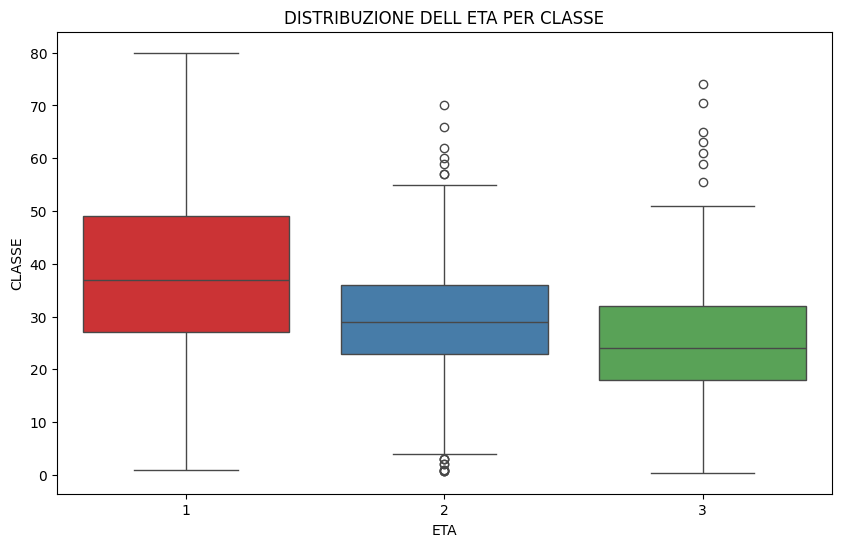

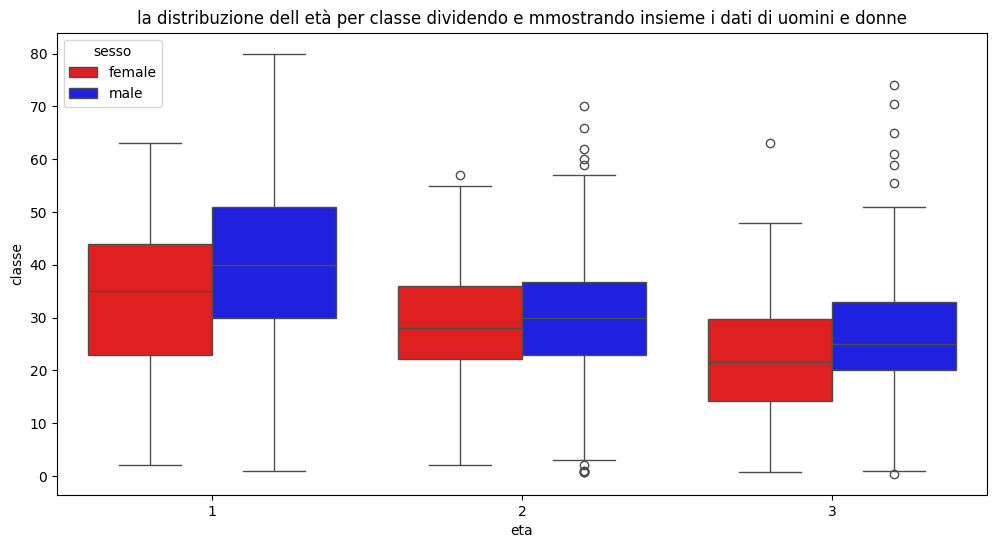

In [20]:
### 2. Analisi del Dataset Titanic

# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

# Quante righe e colonne ha il dataset?
numrei_righe_colonne= df.shape
numrei_righe_colonne

#- Controlla quanti valori mancanti ci sono per colonna
df.isna().sum()
df
# - Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
df.fillna(df['Embarked'].mode()[0])
df['Embarked'].fillna(df['Embarked'].mode()[0])
#df['Embarked'].isna()

# - Rimuovi le righe dove il valore di 'Age' è mancante
df.dropna(subset=['Age'], inplace = True)

# - Controlla se ci sono righe duplicate
df.duplicated().sum() # non ci sono righe duplicated 

#- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio

df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
df['Age']
# df['Age'] = df.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.mean()))
# Verifica
df['Age'].isnull().sum()

'''df.groupby('Pclass')['Age'].mean()
valore_medio = df['Age'].mean()
valore_medio
df.fillna(valore_medio)'''

#- Visualizza la distribuzione dell'età per classe
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=df, palette="Set1")
plt.title('DISTRIBUZIONE DELL ETA PER CLASSE' )
plt.xlabel('ETA')
plt.ylabel('CLASSE')
plt.show()
#sns.boxplot(x='Pclass', y='Age', data=df, color="blue") 
#plt.show() 

#- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne
plt.figure(figsize=(12,6))
#sns.violinplot(x='Pclass', y='Age', hue='Sex', data=df, 
#               split=True, palette={"male": "skyblue", "female": "lightpink"})
sns.boxplot(data=df, x=df['Pclass'], y=df['Age'], hue=df['Sex'], palette={"male": "blue", "female": "red"})
plt.title('la distribuzione dell età per classe dividendo e mmostrando insieme i dati di uomini e donne')
plt.xlabel('eta')
plt.ylabel('classe')      
plt.legend(title='sesso')
plt.show()

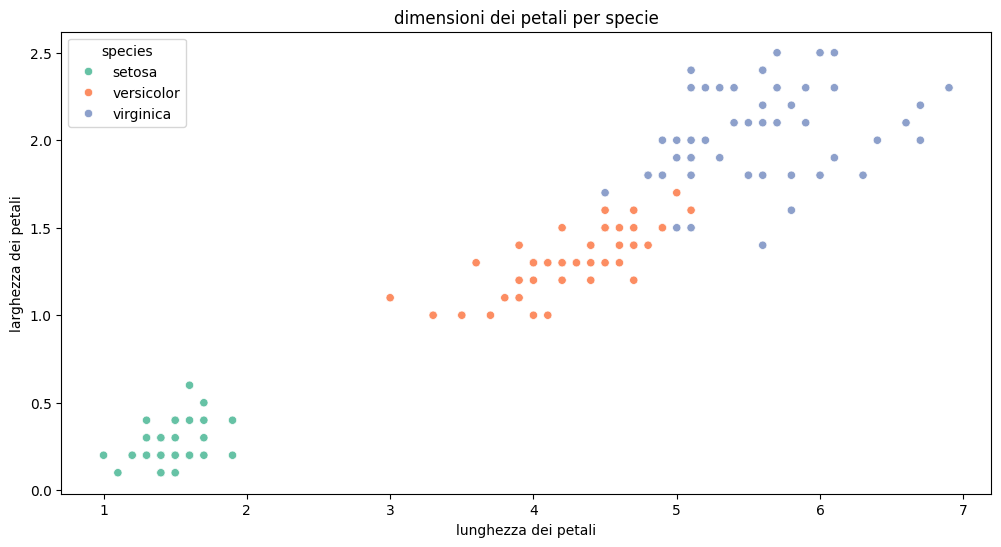

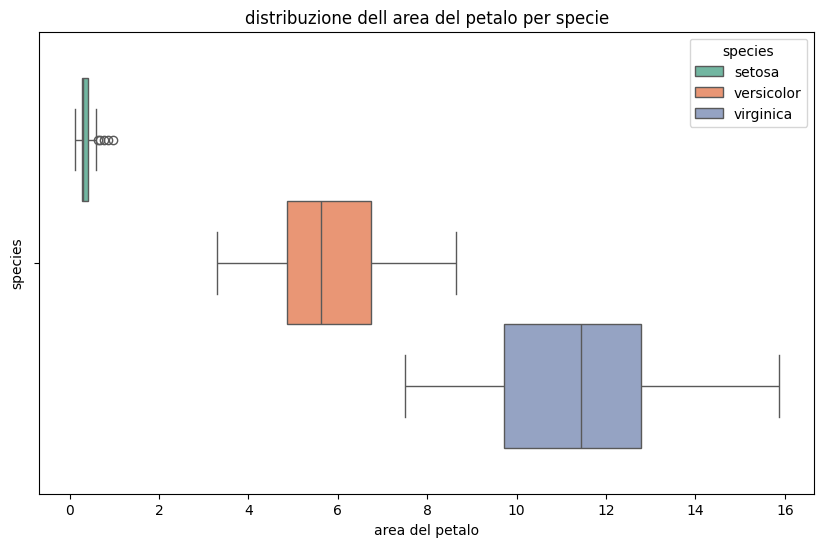

In [ ]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

## 3. Analisi del Dataset Iris

# Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)

df['species'].count()
df['species'].describe()

#- Calcola la lunghezza e la larghezza media dei petali per specie
df.groupby('species')['petal_length'].mean()
df.groupby('species')['petal_width'].mean()

#- Visualizza le dimensioni dei petali per specie (scatterplot) 

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette="Set2")
plt.title('dimensioni dei petali per specie')
plt.xlabel('lunghezza dei petali')
plt.ylabel('larghezza dei petali')
plt.legend(title='species')
plt.show()

#- Crea una nuova colonna per l'area del petalo e analizzala

df['petal_area']=df['petal_length'] * df['petal_width']
df['petal_area']
df['petal_area'].describe()

#- Grafico della distribuzione dell'area del petalo per specie (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='petal_area', hue='species', palette='Set2' )
plt.title('distribuzione dell area del petalo per specie')
plt.xlabel('area del petalo')
plt.ylabel('species')
plt.show()

